In [ ]:
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install keras=="2.2.4"

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 312 kB 31.1 MB/s 
     |████████████████████████████████| 50 kB 7.2 MB/s 
  Attempting uninstall: keras
    Found existing installation: keras 2.8.0
    Uninstalling keras-2.8.0:
      Successfully uninstalled keras-2.8.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.8.2+zzzcolab20220719082949 requires keras<2.9,>=2.8.0rc0, but you have keras 2.2.4 which is incompatible.


In [ ]:
!pip install tensorflow==1.15

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 412.3 MB 22 kB/s 
     |████████████████████████████████| 503 kB 12.2 MB/s 
     |████████████████████████████████| 3.8 MB 38.0 MB/s 
  Created wheel for gast: filename=gast-0.2.2-py3-none-any.whl size=7554 sha256=cdddc4bdfadea62c0bfdb4bb258792a3b944f3be2adf7587f3723bf61f62f48e
  Stored in directory: /root/.cache/pip/wheels/21/7f/02/420f32a803f7d0967b48dd823da3f558c5166991bfd204eef3
Successfully built gast
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.8.0
    Uninstalling tensorflow-estimator-2.8.0:
      Successfully uninstalled tensorflow-estimator-2.8.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.8.0
    Uninstalling tensorboard-2.8.0:
      Successfully uninstalled tensorboard-2.8.0
  Attempting uninstall: gast
    Found existing installation: gast 0.5.

In [ ]:
!mkdir -p ~/.kaggle/
!cp kaggle.json ~/.kaggle/

In [ ]:
!kaggle datasets download -d paultimothymooney/chest-xray-pneumonia

100% 2.28G/2.29G [00:20<00:00, 95.9MB/s]
100% 2.29G/2.29G [00:20<00:00, 121MB/s] 


In [ ]:

import zipfile
with zipfile.ZipFile("/content/chest-xray-pneumonia.zip","r") as zip_ref:
    zip_ref.extractall("chest-xray-pneumonia")

In [ ]:
! mkdir data_used

In [ ]:
!mkdir data_used/NORMAL

In [ ]:
!mkdir data_used/PNEUMONIA

In [ ]:
! cp -r /content/chest-xray-pneumonia/chest_xray/chest_xray/train/NORMAL/*.jpeg   /content/data_used/NORMAL

In [ ]:
! cp -r /content/chest-xray-pneumonia/chest_xray/chest_xray/test/NORMAL/*.jpeg   /content/data_used/NORMAL

In [ ]:
! cp -r /content/chest-xray-pneumonia/chest_xray/chest_xray/val/NORMAL/*.jpeg   /content/data_used/NORMAL

In [ ]:
! cp -r /content/chest-xray-pneumonia/chest_xray/chest_xray/train/PNEUMONIA/*.jpeg   /content/data_used/PNEUMONIA

In [ ]:
! cp -r /content/chest-xray-pneumonia/chest_xray/chest_xray/test/PNEUMONIA/*.jpeg   /content/data_used/PNEUMONIA

In [ ]:
! cp -r /content/chest-xray-pneumonia/chest_xray/chest_xray/val/PNEUMONIA/*.jpeg   /content/data_used/PNEUMONIA

In [ ]:
import zipfile

with zipfile.ZipFile("complexnn.zip","r") as zip_ref:
    zip_ref.extractall()

In [ ]:
import pandas as pd
import numpy as np
import os

from glob import glob
import itertools
import fnmatch
import random
import matplotlib.pylab as plt
#import seaborn as sns
import cv2
from sklearn.model_selection import train_test_split
%matplotlib inline

In [ ]:
imagePatches = glob('/content/data_used/*/*.jpeg', recursive=True)
for filename in imagePatches[0:1000]:
    print(filename)

/content/data_used/PNEUMONIA/person843_bacteria_2763.jpeg
/content/data_used/PNEUMONIA/person508_virus_1020.jpeg
/content/data_used/PNEUMONIA/person1311_virus_2257.jpeg
/content/data_used/PNEUMONIA/person319_virus_645.jpeg
/content/data_used/PNEUMONIA/person1212_virus_2057.jpeg
/content/data_used/PNEUMONIA/person1230_bacteria_3185.jpeg
/content/data_used/PNEUMONIA/person1071_bacteria_3005.jpeg
/content/data_used/PNEUMONIA/person1150_bacteria_3095.jpeg
/content/data_used/PNEUMONIA/person1475_virus_2558.jpeg
/content/data_used/PNEUMONIA/person1411_bacteria_3602.jpeg
/content/data_used/PNEUMONIA/person1114_bacteria_3055.jpeg
/content/data_used/PNEUMONIA/person610_bacteria_2475.jpeg
/content/data_used/PNEUMONIA/person531_bacteria_2236.jpeg
/content/data_used/PNEUMONIA/person1864_bacteria_4736.jpeg
/content/data_used/PNEUMONIA/person1455_virus_2496.jpeg
/content/data_used/PNEUMONIA/person548_bacteria_2300.jpeg
/content/data_used/PNEUMONIA/person97_bacteria_468.jpeg
/content/data_used/PNEUMO

In [ ]:
patternZero = '*IM*.jpeg'
patternOne = '*person*.jpeg'
classZero = fnmatch.filter(imagePatches, patternZero)
classOne = fnmatch.filter(imagePatches, patternOne)
print("IDC(-)\n\n",classZero[0:5],'\n')
print("IDC(+)\n\n",classOne[0:5])

IDC(-)

 ['/content/data_used/NORMAL/NORMAL2-IM-0945-0001.jpeg', '/content/data_used/NORMAL/IM-0410-0001.jpeg', '/content/data_used/NORMAL/IM-0607-0001.jpeg', '/content/data_used/NORMAL/NORMAL2-IM-0060-0001.jpeg', '/content/data_used/NORMAL/NORMAL2-IM-0475-0001.jpeg'] 

IDC(+)

 ['/content/data_used/PNEUMONIA/person843_bacteria_2763.jpeg', '/content/data_used/PNEUMONIA/person508_virus_1020.jpeg', '/content/data_used/PNEUMONIA/person1311_virus_2257.jpeg', '/content/data_used/PNEUMONIA/person319_virus_645.jpeg', '/content/data_used/PNEUMONIA/person1212_virus_2057.jpeg']


In [ ]:
print(len(classZero))
print(len(classOne))

1583
4273


In [ ]:
X=[]
y=[]

for u in classZero:
  X.append(u)
  y.append(0)

for u in classOne:
  X.append(u)
  y.append(1)

In [ ]:
df = pd.DataFrame()
df["images"]=X
df["labels"]=y
df=df.sample(frac=1)

In [ ]:
def RgbToQuaternion(img):
 b,g,r = cv2.split(img)

 M=np.zeros((50,50,4))
 M[:,:,1]=r
 M[:,:,2]=g
 M[:,:,3]=b
 return(np.array(M))

In [ ]:
def batch_generator(df,batch_size,steps):
 idx=1
 while True: 
  yield load_data(df,idx-1,batch_size)## Yields data
  if idx < steps:
    idx+=1
  else:
    idx=1

In [ ]:
def load_data(df,idx,batch_size):
 start=idx*batch_size
 end=(idx+1)*batch_size
 x = []
 y = [] 
 for  row  in df.values[start:end,:]:
  img=row[0]

  full_size_image = cv2.imread(img)
  X=cv2.resize(full_size_image, (50,50), interpolation=cv2.INTER_CUBIC)

  image = RgbToQuaternion(X) /255.
  x.append(image) 
  y.append(row[-1] )

 return (np.array(x).reshape(-1,50,50,4), np.array(y).reshape(-1))

In [ ]:
df_train, df = train_test_split(df, test_size=0.20)
df_test, df_val = train_test_split(df, test_size=0.5)

In [ ]:

from   complexnn                             import *
import keras
from   keras.layers                          import *
from   keras.models                          import Model
import keras.backend                         as     K
import numpy                                 as     np


Using TensorFlow backend.


In [ ]:
#from   tensorflow.keras.layers                          import *

In [ ]:
from keras.optimizers import Adam

In [ ]:
#from keras.optimizers import adam
opt = Adam(lr = 0.001,decay=1e-6)

In [ ]:
#import tensorflow as tf
# ensure consistency across runs
from numpy.random import seed
seed(1)

In [ ]:
class ChannelAttention(keras.layers.Layer):
      def __init__(self, filters, ratio):
        super(ChannelAttention, self).__init__()
        self.filters = filters
        self.ratio = ratio

        def build(self, input_shape):
            self.shared_layer_one = tf.keras.layers.Dense(self.filters//self.ratio,
                             activation='relu', kernel_initializer='he_normal', 
                              use_bias=True, 
                              bias_initializer='zeros')
            self.shared_layer_two = tf.keras.layers.Dense(self.filters,
                             kernel_initializer='he_normal',
                             use_bias=True,
                             bias_initializer='zeros')

        def call(self, inputs):
            # AvgPool
            avg_pool = keras.layers.GlobalAveragePooling2D()(inputs)
            

            avg_pool = self.shared_layer_one(avg_pool)
            avg_pool = self.shared_layer_two(avg_pool)

            # MaxPool
            max_pool = keras.layers.GlobalMaxPooling2D()(inputs)
            max_pool = keras.layers.Reshape((1,1,filters))(max_pool)

            max_pool = self.shared_layer_one(max_pool)
            max_pool = self.shared_layer_two(max_pool)


            attention = keras.layers.Add()([avg_pool,max_pool])
            attention = keras.layers.Activation('sigmoid')(attention)
            
            return keras.layers.Multiply()([inputs, attention])

class SpatialAttention(keras.layers.Layer):
      def __init__(self, kernel_size):
        super(SpatialAttention, self).__init__()
        self.kernel_size = kernel_size
        
        def build(self, input_shape):
            self.conv2d = keras.layers.Conv2D(filters = 1,
                    kernel_size=self.kernel_size,
                    strides=1,
                    padding='same',
                    activation='sigmoid',
                    kernel_initializer='he_normal',
                    use_bias=False)

        def call(self, inputs):
            
            # AvgPool
            avg_pool = keras.layers.Lambda(lambda x: tf.keras.backend.mean(x, axis=3, keepdims=True))(inputs)
            
            # MaxPool
            max_pool = keras.layers.Lambda(lambda x: tf.keras.backend.max(x, axis=3, keepdims=True))(inputs)

            attention = keras.layers.Concatenate(axis=3)([avg_pool, max_pool])

            attention = self.conv2d(attention)


            return tf.keras.layers.multiply([inputs, attention])



In [ ]:
def residual_block(mod_, f_in, f_out, strides_ = (1,1), use_shortcut_ = False):   
    shortcut_ = mod_
    
    k_ = (1,1)
    
    mod_ = QuaternionConv2D(f_in, kernel_size=k_, strides=(1,1), padding = "same")(mod_)
    mod_ = BatchNormalization()(mod_)
    mod_ = ELU()(mod_)
    
    mod_ = QuaternionConv2D(f_in, kernel_size=k_, strides=strides_, padding = "same")(mod_)
    mod_ = BatchNormalization()(mod_)
    mod_ = ELU()(mod_)
    
    mod_ = QuaternionConv2D(f_out, kernel_size=k_, strides=(1,1), padding = "same")(mod_)
    mod_ = BatchNormalization()(mod_)
    mod_ = ELU()(mod_)
    
    if use_shortcut_ == True or strides_ != (1,1):
        shortcut_ = QuaternionConv2D(f_out, kernel_size=k_, strides=strides_, padding = "same")(shortcut_)
        shortcut_ = BatchNormalization()(shortcut_)
        
    mod_ = Add()([shortcut_, mod_])
    mod_ = ReLU()(mod_)
    
    return mod_

In [ ]:
class_weights=[1.85,0.69]

In [ ]:
def model_build(in_):
    
    k_=(1,1)
    
    mod_ = QuaternionConv2D(16, kernel_size=k_, strides = (1,1), padding = "same")(in_)
    
    mod_ = BatchNormalization()(mod_)    
    
    mod_ = ReLU()(mod_)
    mod_=  ChannelAttention(16, 8)(mod_)
    mod_= SpatialAttention(3)(mod_)
    mod_ = MaxPooling2D()(mod_)
    
    mod_ = residual_block(mod_, 16, 32, use_shortcut_=True)
    
    mod_ = MaxPooling2D()(mod_)
    mod_=  ChannelAttention(16, 8)(mod_)
    mod_= SpatialAttention(3)(mod_)
    
    mod_ = residual_block(mod_, 32, 64, use_shortcut_=True)
    
    mod_ = MaxPooling2D()(mod_)
    mod_=  ChannelAttention(32, 8)(mod_)
    mod_= SpatialAttention(3)(mod_)
    
    mod_ = residual_block(mod_, 64, 96, use_shortcut_=True)
    
    mod_ = MaxPooling2D()(mod_)
    mod_=  ChannelAttention(64, 8)(mod_)
    mod_= SpatialAttention(3)(mod_)
    
    mod_ = residual_block(mod_, 96, 128, use_shortcut_=True)
    
    mod_ = MaxPooling2D()(mod_)
    mod_=  ChannelAttention(96, 8)(mod_)
    mod_= SpatialAttention(3)(mod_)
    
    
    mod_ = GlobalAveragePooling2D()(mod_)
    
    mod_ = Dense(512, activation = "relu")(mod_)
    
    mod_ = Dropout(0.5)(mod_)
    
    mod_ = Dense(1, activation="sigmoid")(mod_)
    
    return mod_

In [ ]:
def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

In [ ]:
in_ = Input((50,50,4))
model_ = model_build(in_)













Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [ ]:
model = Model(input = in_, output = model_)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`
  """Entry point for launching an IPython kernel.


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout , BatchNormalization, GlobalAveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from tensorflow.keras.callbacks import ReduceLROnPlateau
import cv2
import os

In [ ]:
METRICS = [
      tf.keras.metrics.TruePositives(name='tp'),
      tf.keras.metrics.FalsePositives(name='fp'),
      tf.keras.metrics.TrueNegatives(name='tn'),
      tf.keras.metrics.FalseNegatives(name='fn'), 
      tf.keras.metrics.BinaryAccuracy(name='accuracy'),
      tf.keras.metrics.Precision(name='precision'),
      tf.keras.metrics.Recall(name='recall'),
      tf.keras.metrics.AUC(name='roc', curve='ROC'), # roc curve
      tf.keras.metrics.AUC(name='prc', curve='PR') # precision-recall curve
]

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
from keras.callbacks import ReduceLROnPlateau

In [ ]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', patience=2, verbose=1, factor=0.8)

In [ ]:
           
model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy',METRICS])



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [ ]:
history =model.fit_generator(batch_generator(df_train, 586,len(df_train)//586),steps_per_epoch=len(df_train)//586,epochs=40,class_weight=class_weights,verbose=1,validation_data=batch_generator(df_val, 64,len(df_val)//64),validation_steps=len(df_val)//64,callbacks=[learning_rate_reduction])



Epoch 1/40
7/7 [==============================] - 68s 10s/step - loss: 1.7867 - acc: 0.6919 - precision_m: 0.7909 - recall_m: 0.8034 - f1_m: 0.7488 - val_loss: 5.0898 - val_acc: 0.2708 - val_precision_m: 0.7778 - val_recall_m: 0.0351 - val_f1_m: 0.0655
Epoch 2/40
7/7 [==============================] - 55s 8s/step - loss: 0.4211 - acc: 0.8479 - precision_m: 0.8952 - recall_m: 0.9028 - f1_m: 0.8971 - val_loss: 3.4892 - val_acc: 0.2622 - val_precision_m: 0.6667 - val_recall_m: 0.0236 - val_f1_m: 0.0449
Epoch 3/40
7/7 [==============================] - 56s 8s/step - loss: 0.2902 - acc: 0.8781 - precision_m: 0.9242 - recall_m: 0.9087 - f1_m: 0.9162 - val_loss: 1.7993 - val_acc: 0.2917 - val_precision_m: 1.0000 - val_recall_m: 0.0623 - val_f1_m: 0.1149
Epoch 4/40
7/7 [==============================] - 57s 8s/step - loss: 0.2612 - acc: 0.8966 - precision_m: 0.9244 - recall_m: 0.9380 - f1_m: 0.9303 - val_loss: 2.0577 - val_acc: 0.2708 - val_precision_m: 0.6667 - val_recall_m: 0.0347 - val_f1

In [ ]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 50, 50, 4)    0                                            
__________________________________________________________________________________________________
quaternion_conv2d_1 (Quaternion (None, 50, 50, 64)   128         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 50, 50, 64)   256         quaternion_conv2d_1[0][0]        
__________________________________________________________________________________________________
re_lu_1 (ReLU)                  (None, 50, 50, 64)   0           batch_normalization_1[0][0]      
__________________________________________________________________________________________________
channel_at

In [ ]:
len(model.layers)

75

In [ ]:
print(history.history.keys())

dict_keys(['val_loss', 'val_acc', 'val_precision_m', 'val_recall_m', 'val_f1_m', 'loss', 'acc', 'precision_m', 'recall_m', 'f1_m', 'lr'])


dict_keys(['val_loss', 'val_acc', 'val_precision_m', 'val_recall_m', 'val_f1_m', 'loss', 'acc', 'precision_m', 'recall_m', 'f1_m', 'lr'])


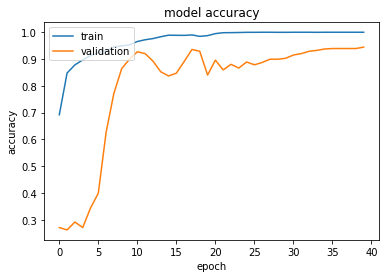

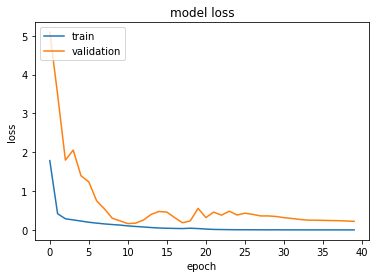

In [ ]:
# tensorboard logs 
print(history.history.keys())
#  "Accuracy"
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.savefig('acc')
plt.show()

# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')

plt.savefig('loss')
plt.show()

dict_keys(['val_loss', 'val_acc', 'val_precision_m', 'val_recall_m', 'val_f1_m', 'loss', 'acc', 'precision_m', 'recall_m', 'f1_m', 'lr'])


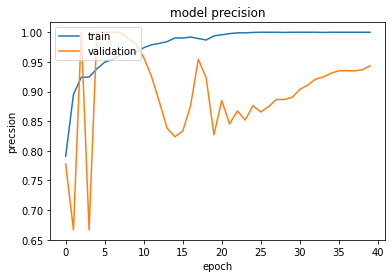

In [ ]:
# tensorboard logs 
print(history.history.keys())
#  "Accuracy"
plt.plot(history.history['precision_m'])
plt.plot(history.history['val_precision_m'])
plt.title('model precision')
plt.ylabel('precsion')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.savefig('precsion')
plt.show()

dict_keys(['val_loss', 'val_acc', 'val_precision_m', 'val_recall_m', 'val_f1_m', 'loss', 'acc', 'precision_m', 'recall_m', 'f1_m', 'lr'])


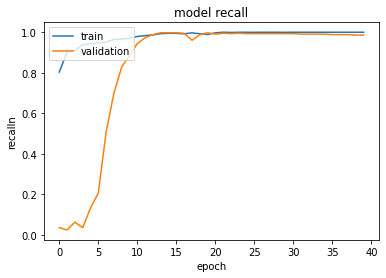

In [ ]:
# tensorboard logs 
print(history.history.keys())
#  "Accuracy"
plt.plot(history.history['recall_m'])
plt.plot(history.history['val_recall_m'])
plt.title('model recall')
plt.ylabel('recalln')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.savefig('recall')
plt.show()

dict_keys(['val_loss', 'val_acc', 'val_precision_m', 'val_recall_m', 'val_f1_m', 'loss', 'acc', 'precision_m', 'recall_m', 'f1_m', 'lr'])


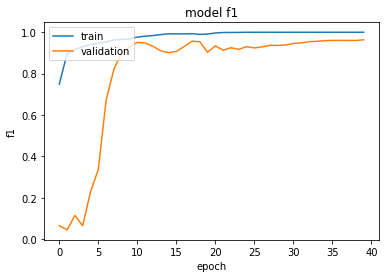

In [ ]:
# tensorboard logs 
print(history.history.keys())
#  "Accuracy"
plt.plot(history.history['f1_m'])
plt.plot(history.history['val_f1_m'])
plt.title('model f1')
plt.ylabel('f1')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.savefig('f1')
plt.show()

In [ ]:
print('\nhistory dict:', history.history)


history dict: {'val_loss': [5.089825948079427, 3.4891668955485025, 1.7992684708701239, 2.057715508672926, 1.3964502943886652, 1.2395343912972345, 0.7521239982710944, 0.5459219349755181, 0.30477043489615124, 0.23633514841397604, 0.165709955824746, 0.17848551107777488, 0.2570902440283034, 0.4038960337638855, 0.4779110766119427, 0.4614335894584656, 0.32053035497665405, 0.18780673957533306, 0.23613504320383072, 0.5580746630827585, 0.32144345839818317, 0.46221011214786106, 0.38342978722519344, 0.48469318283928764, 0.3873126308123271, 0.43403710093763137, 0.4033516016271379, 0.36361892024676007, 0.36358721719847786, 0.34902481734752655, 0.31953568508227664, 0.29807796825965244, 0.27502477500173783, 0.2563672537604968, 0.2527435099085172, 0.24991483406888115, 0.24482465287049612, 0.24170215138130718, 0.232582935028606, 0.22591778967115614], 'val_acc': [0.2708333333333333, 0.2621527777777778, 0.2916666666666667, 0.2708333333333333, 0.34375, 0.3993055555555556, 0.6267361111111112, 0.7725694444

# Evaluation on testing set 

In [ ]:
len(df_test),len(df_val),len(df_train)

(586, 586, 4684)

In [ ]:

loss, accuracy,  precision, recall,f1_score = model.evaluate_generator(batch_generator(df_test[:586], 586,len(df_test[:586])//586),steps=len(df_test[:586])//586,verbose=1)

1/1 [==============================] - 11s 11s/step


In [ ]:
print(model.evaluate_generator(batch_generator(df_test[:586], 586,len(df_test[:586])//586),steps=len(df_test[:586])//586,verbose=1))

1/1 [==============================] - 21s 21s/step
[0.3278338313102722, 0.9112628102302551, 0.9078341126441956, 0.9704433679580688, 0.938095211982727]


In [ ]:
print(model.evaluate_generator(batch_generator(df_train[:586], 586,len(df_train[:586])//586),steps=len(df_train[:586])//586,verbose=1))

1/1 [==============================] - 11s 11s/step
[0.02323894016444683, 0.9914675951004028, 0.9887892603874207, 1.0, 0.994363009929657]


In [ ]:
print(model.evaluate_generator(batch_generator(df_val[:586], 586,len(df_val[:856])//586),steps=len(df_val[:586])//586,verbose=1))

1/1 [==============================] - 7s 7s/step
[0.2222186177968979, 0.9453924894332886, 0.9436008930206299, 0.9863945841789246, 0.9645233154296875]


In [ ]:
help(model.evaluate_generator)

### **The performance metrics**

In [ ]:
from sklearn.metrics import confusion_matrix

y_pred=model.predict_generator(batch_generator(df_test[:586], 586,len(df_test[:586])//586),steps=len(df_test[:586])//586,verbose=1)

y_true=df_test[:586].labels
array=confusion_matrix(y_true, (1.2*y_pred).round(),normalize="true")

1/1 [==============================] - 8s 8s/step


In [ ]:
from sklearn.datasets import make_circles
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
accuracy = accuracy_score(y_true, (1.2*y_pred).round())

In [ ]:
import sklearn.metrics as metrics

In [ ]:
print(metrics.accuracy_score(y_true, (1.2*y_pred).round()))

0.9044368600682594


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# machine learning libraries

import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.feature_selection import RFE
from sklearn.metrics import confusion_matrix

from sklearn.metrics import roc_curve,roc_auc_score

import warnings
warnings.filterwarnings('ignore')

In [ ]:
# # Let's plot accuracy sensitivity and specificity for various probabilities.


import matplotlib.pyplot as plt


cutoff_df = pd.DataFrame( columns = ['Probability','Accuracy','Sensitivity','Specificity'])
plt.savefig('ss')
plt.show()


<Figure size 432x288 with 0 Axes>

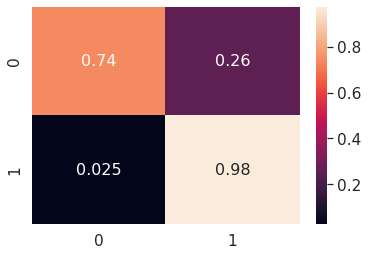

In [ ]:
import seaborn as sn

df_cm = pd.DataFrame(array, range(2), range(2))
# plt.figure(figsize=(10,7))
sn.set(font_scale=1.4) # for label size
sn.heatmap(df_cm, annot=True, annot_kws={"size": 16}) # font size
plt.savefig("conf")
plt.show()

In [ ]:
df_cm

,0,1
0,0.744444,0.255556
1,0.024631,0.975369


In [ ]:
help(model.predict_generator)

Help on method predict_generator in module keras.engine.training:

predict_generator(generator, steps=None, max_queue_size=10, workers=1, use_multiprocessing=False, verbose=0) method of keras.engine.training.Model instance
    Generates predictions for the input samples from a data generator.
    
    The generator should return the same kind of data as accepted by
    `predict_on_batch`.
    
    # Arguments
        generator: Generator yielding batches of input samples
            or an instance of Sequence (keras.utils.Sequence)
            object in order to avoid duplicate data
            when using multiprocessing.
        steps: Total number of steps (batches of samples)
            to yield from `generator` before stopping.
            Optional for `Sequence`: if unspecified, will use
            the `len(generator)` as a number of steps.
        max_queue_size: Maximum size for the generator queue.
        workers: Integer. Maximum number of processes to spin up
            w

In [ ]:
tn, fp, fn, tp =array.ravel()

In [ ]:
specificity =tn / (tn + fp)

In [ ]:
specificity

0.7444444444444445

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [ ]:
model.save_weights('mymodel_weights')

In [ ]:
i=1
for x in model.layers:
  print(i,x)
  i=i+1

1 <keras.engine.input_layer.InputLayer object at 0x7fe4eee018d0>
2 <complexnn.conv.QuaternionConv2D object at 0x7fe4eee017d0>
3 <keras.layers.normalization.BatchNormalization object at 0x7fe4eee01350>
4 <keras.layers.advanced_activations.ReLU object at 0x7fe4ef664110>
5 <__main__.ChannelAttention object at 0x7fe4eee1aa90>
6 <__main__.SpatialAttention object at 0x7fe4eee1f210>
7 <keras.layers.pooling.MaxPooling2D object at 0x7fe4eee1f250>
8 <complexnn.conv.QuaternionConv2D object at 0x7fe4e01ca2d0>
9 <keras.layers.normalization.BatchNormalization object at 0x7fe4e021af50>
10 <keras.layers.advanced_activations.ELU object at 0x7fe4ef664a10>
11 <complexnn.conv.QuaternionConv2D object at 0x7fe4e01f1f50>
12 <keras.layers.normalization.BatchNormalization object at 0x7fe4e01a6950>
13 <keras.layers.advanced_activations.ELU object at 0x7fe4e01a6510>
14 <complexnn.conv.QuaternionConv2D object at 0x7fe4e0172450>
15 <complexnn.conv.QuaternionConv2D object at 0x7fe4e00d0ed0>
16 <keras.layers.normali

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.utils.vis_utils import plot_model

plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
len(model.layers)

75

In [ ]:
import pandas as pd

In [ ]:
# convert the history.history dict to a pandas DataFrame:     
hist_df = pd.DataFrame(history.history) 

# save to json:  
hist_json_file = 'history.json' 
with open(hist_json_file, mode='w') as f:
    hist_df.to_json(f)

# or save to csv: 
hist_csv_file = 'history.csv'
with open(hist_csv_file, mode='w') as f:
    hist_df.to_csv(f)

In [ ]:
from sklearn.metrics import confusion_matrix

y_pred=model.predict_generator(batch_generator(df_val[:586], 586,len(df_val[:586])//586),steps=len(df_val[:586])//586,verbose=1)

y_true=df_val[:586].labels
array=confusion_matrix(y_true, (1.2*y_pred).round(),normalize="true")

1/1 [==============================] - 7s 7s/step


In [ ]:
accuracy = accuracy_score(y_true, (1.2*y_pred).round())

In [ ]:
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_true, (1.2*y_pred).round())
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_true, (1.2*y_pred).round())
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_true, (1.2*y_pred).round())
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_true, (1.2*y_pred).round())
print('F1 score: %f' % f1)
 
# kappa
kappa = cohen_kappa_score(y_true, (1.2*y_pred).round())
print('Cohens kappa: %f' % kappa)
# ROC AUC
auc = roc_auc_score(y_true, (1.2*y_pred).round())
print('ROC AUC: %f' % auc)
# confusion matrix
matrix = confusion_matrix(y_true, (1.2*y_pred).round())
print(matrix)

Accuracy: 0.940273
Precision: 0.935622
Recall: 0.988662
F1 score: 0.961411
Cohens kappa: 0.829778
ROC AUC: 0.890883
[[115  30]
 [  5 436]]


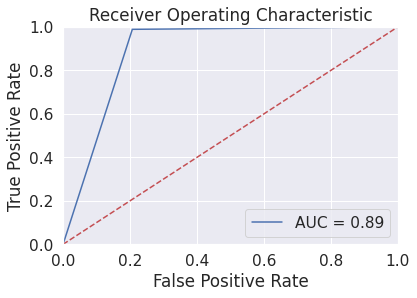

In [ ]:
fpr, tpr, threshold = metrics.roc_curve(y_true, (1.2*y_pred).round())
roc_auc = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label='AUC = %0.2f' % roc_auc)
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.savefig('roc')
plt.show()
